# Sentinel Project

In [1]:
# Import needed libraries
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from PIL import Image
from matplotlib import pyplot
import numpy as np
import gc

### Gulf of Gabes

JPEG
(3023, 2015)
RGB


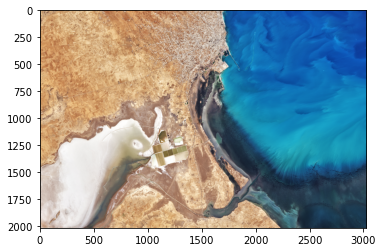

In [2]:
# Open the image using Image function from PIL library
image = Image.open('GulfOfGabes.jpg')

# summarize some details about the image
# format of image
print(image.format)
# size of image
print(image.size)
# color mode(RGB as we discussed)
print(image.mode)

# plot of image
pyplot.imshow(image)

In [3]:
# covert data into array (3 dimensions [height,width,color])
data = np.asarray(image)
# reshape into one long array for each color
r = np.reshape(data[:,:,0],(6091345,1))
g = np.reshape(data[:,:,1],(6091345,1))
b = np.reshape(data[:,:,2],(6091345,1))

# concatenate arrays to make 3 columbs (one for each color)
rgb = np.concatenate((r,g,b),axis=1)

In [4]:
kmeans = MiniBatchKMeans(n_clusters=5, random_state=0, batch_size=3072).fit(rgb)

landcover = kmeans.predict(rgb)

# reshape back into original 2-d array
landcover2D = np.reshape(landcover,(2015,3023))

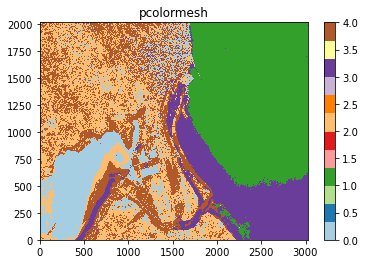

In [5]:
del data, r, g, b, rgb, kmeans, landcover
gc.collect()

# plot the categorized image (I noticed it was upsidedown so I flipped it
# using np.flipud)
fig, ax = pyplot.subplots()
c = ax.pcolormesh(np.flipud(landcover2D), cmap='Paired', vmin=0, vmax=4)
ax.set_title('pcolormesh')
fig.colorbar(c, ax=ax)
pyplot.show()

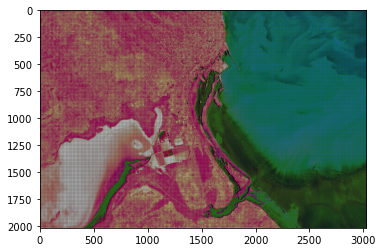

In [6]:
fig.clear()
ax.clear()

# recategorize areas as either water of land by looking at previous image 
# (This may change during each run so you always need to check)
landwater = np.where((landcover2D == 1) | (landcover2D == 3), 1,0)

# Create new plot with the original image and the classification on top
# The alpha value makes it transparent
fig2,ax2 = pyplot.subplots()
ax2.imshow(image)
ax2.pcolormesh(landwater, cmap='PiYG', vmin=0, vmax=1,alpha=0.002)

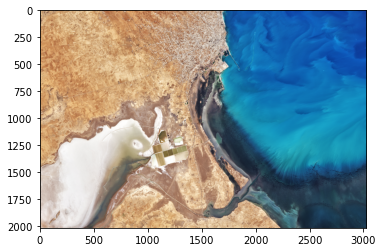

In [7]:
fig.clear()
ax.clear()

del landcover2D
gc.collect()

# Create new image with added alpha channel and print to screen
landImage = image.convert("RGBA")
pyplot.imshow(landImage)

In [8]:
# get the new data
data2 = landImage.getdata()
# reshape the classified (water/land) array into a 1d array
landwater1D = np.reshape(landwater,(6091345,1))

# loop through the data and make water pixels transparant using the classified landwater data
landData = []
for i, item in enumerate(data2):
    if landwater1D[i] == 1:
        landData.append((item[0], item[1], item[2], 0))
    else:
        landData.append(item)

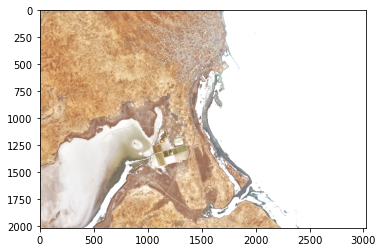

In [9]:
# Add the new masked data to the image
landImage.putdata(landData)
# Show the land image
pyplot.imshow(landImage)
# Save land image as a .png file
landImage.save("./GulfLand.png", "PNG")

In [10]:
del data2, landData
gc.collect()

# Repeat previous steps for water
# create new image with alpha data channel
waterImage = image.convert("RGBA")
data3 = waterImage.getdata()
waterData = []
for i, item in enumerate(data3):
    if landwater1D[i] == 0:
        waterData.append((item[0], item[1], item[2], 0))
    else:
        waterData.append(item)

5

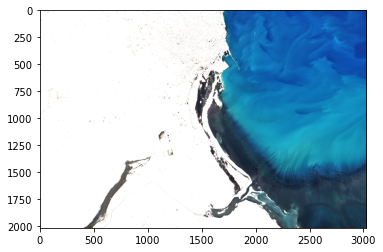

In [11]:
# Add new masked data to image
waterImage.putdata(waterData)
# Show the water image
pyplot.imshow(waterImage)
# Save land image as .png file
waterImage.save("./GulfWater.png", "PNG")

del waterImage, data3, waterData, landwater1D
gc.collect()

### Puget Sound

(7614, 10488)


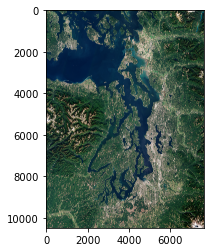

In [12]:
image = Image.open('Puget_Sound_by_Sentinel-2.jpg')

print(image.size)

pyplot.imshow(image)

In [13]:
data = np.asarray(image)

r = np.reshape(data[:,:,0],(79855632,1))
g = np.reshape(data[:,:,1],(79855632,1))
b = np.reshape(data[:,:,2],(79855632,1))

rgb = np.concatenate((r,g,b),axis=1)

In [14]:
kmeans = MiniBatchKMeans(n_clusters=12, random_state=0, batch_size=1536).fit(rgb)

landcover = kmeans.predict(rgb)

landcover2D = np.reshape(landcover,(10488,7614))

C:\Users\Clemens\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=6
  warnings.warn(


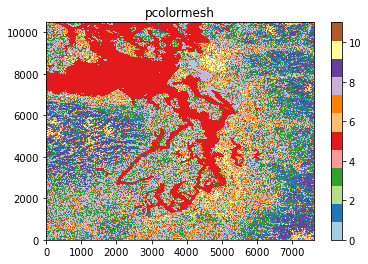

In [15]:
del data, r, g, b, rgb, kmeans, landcover
gc.collect()

fig, ax = pyplot.subplots()
c = ax.pcolormesh(np.flipud(landcover2D), cmap='Paired', vmin=0, vmax=11)
ax.set_title('pcolormesh')
fig.colorbar(c, ax=ax)
pyplot.show()

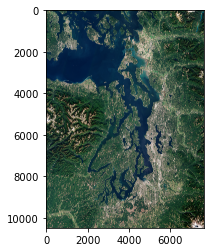

In [16]:
fig.clear()
ax.clear()

landwater = np.where((landcover2D == 5) | (landcover2D == 8), 1,0)

fig2,ax2 = pyplot.subplots()
ax2.imshow(image)
ax2.pcolormesh(landwater, cmap='PiYG', vmin=0, vmax=1,alpha=.002)

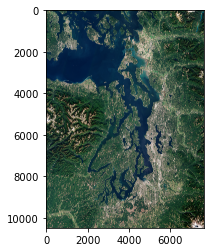

In [17]:
fig.clear()
ax.clear()

del landcover2D
gc.collect()

landImage = image.convert("RGBA")
pyplot.imshow(landImage)

In [18]:
data2 = landImage.getdata()

landwater1D = np.reshape(landwater,(79855632,1))

landData = []
for i, item in enumerate(data2):
    if landwater1D[i] == 1:
        landData.append((item[0], item[1], item[2], 0))
    else:
        landData.append(item)

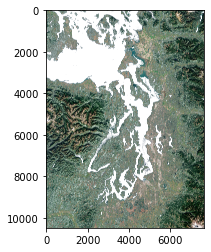

In [19]:
landImage.putdata(landData)

pyplot.imshow(landImage)
landImage.save("./PugetLand.png", "PNG")

In [20]:
del data2, landData
gc.collect()

waterImage = image.convert("RGBA")
data3 = waterImage.getdata()
waterData = []
for i, item in enumerate(data3):
    if landwater1D[i] == 0:
        waterData.append((item[0], item[1], item[2], 0))
    else:
        waterData.append(item)

0

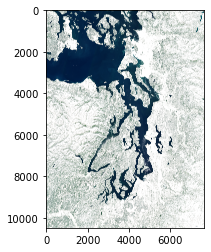

In [21]:
waterImage.putdata(waterData)

pyplot.imshow(waterImage)

waterImage.save("./PugetWater.png", "PNG")

del waterImage, data3, waterData, landwater1D
gc.collect()

### Bay Area

C:\Users\Clemens\anaconda3\lib\site-packages\PIL\Image.py:2855: DecompressionBombWarning: Image size (89611690 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(9190, 9751)


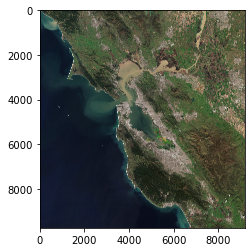

In [22]:
image = Image.open('Bay_Area_by_Sentinel-2.jpg')

print(image.size)

pyplot.imshow(image)

In [23]:
data = np.asarray(image)

r = np.reshape(data[:,:,0],(89611690,1))
g = np.reshape(data[:,:,1],(89611690,1))
b = np.reshape(data[:,:,2],(89611690,1))

rgb = np.concatenate((r,g,b),axis=1)

In [24]:
kmeans = MiniBatchKMeans(n_clusters=12, random_state=0, batch_size=3072).fit(rgb)

landcover = kmeans.predict(rgb)

landcover2D = np.reshape(landcover,(9751,9190))

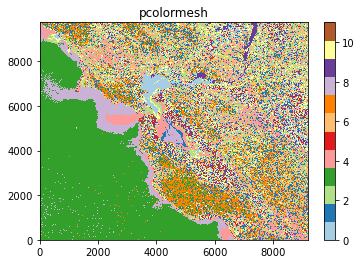

In [25]:
del data, r, g, b, rgb, kmeans, landcover
gc.collect()

fig, ax = pyplot.subplots()
c = ax.pcolormesh(np.flipud(landcover2D), cmap='Paired', vmin=0, vmax=11)
ax.set_title('pcolormesh')
fig.colorbar(c, ax=ax)
pyplot.show()

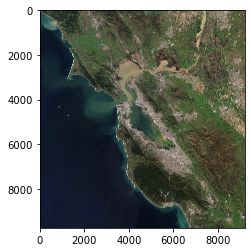

In [26]:
fig.clear()
ax.clear()

landwater = np.where((landcover2D == 0) | (landcover2D == 3) | (landcover2D == 4) | (landcover2D == 8) | (landcover2D == 9),1,0)

fig2,ax2 = pyplot.subplots()
ax2.imshow(image)
ax2.pcolormesh(landwater, cmap='PiYG', vmin=0, vmax=1,alpha=0.006)

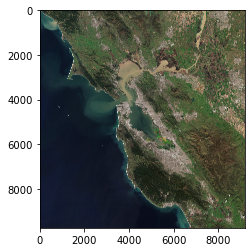

In [27]:
fig.clear()
ax.clear()

del landcover2D
gc.collect()

landImage = image.convert("RGBA")
pyplot.imshow(landImage)

In [28]:
data2 = landImage.getdata()

landwater1D = np.reshape(landwater,(89611690,1))

landData = []
for i, item in enumerate(data2):
    if landwater1D[i] == 1:
        landData.append((item[0], item[1], item[2], 0))
    else:
        landData.append(item)

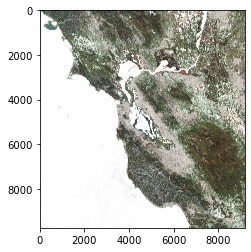

In [29]:
landImage.putdata(landData)

pyplot.imshow(landImage)

landImage.save("./BayLand.png", "PNG")

In [30]:
del data2, landData
gc.collect()


waterImage = image.convert("RGBA")
data3 = waterImage.getdata()
waterData = []
for i, item in enumerate(data3):
    if landwater1D[i] == 0:
        waterData.append((item[0], item[1], item[2], 0))
    else:
        waterData.append(item)

0

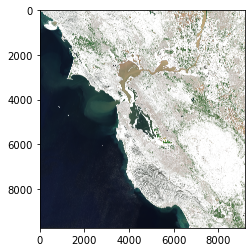

In [31]:
waterImage.putdata(waterData)

pyplot.imshow(waterImage)

waterImage.save("./BayWater.png", "PNG")

del waterImage, data3, waterData, landwater1D
gc.collect()

### Tunis

(2000, 1817)


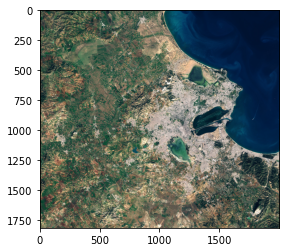

In [32]:
image = Image.open('TunisSentinel2.jpg')

print(image.size)

pyplot.imshow(image)

In [33]:
data = np.asarray(image)

r = np.reshape(data[:,:,0],(3634000,1))
g = np.reshape(data[:,:,1],(3634000,1))
b = np.reshape(data[:,:,2],(3634000,1))

rgb = np.concatenate((r,g,b),axis=1)

In [34]:
kmeans = MiniBatchKMeans(n_clusters=12, random_state=0, batch_size=3072).fit(rgb)

landcover = kmeans.predict(rgb)

landcover2D = np.reshape(landcover,(1817,2000))

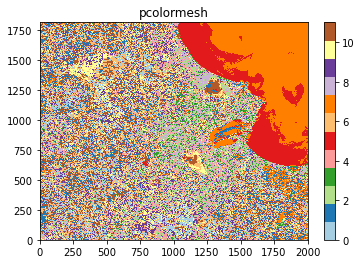

In [35]:
del data, r, g, b, rgb, kmeans, landcover
gc.collect()

fig, ax = pyplot.subplots()
c = ax.pcolormesh(np.flipud(landcover2D), cmap='Paired', vmin=0, vmax=11)
ax.set_title('pcolormesh')
fig.colorbar(c, ax=ax)
pyplot.show()

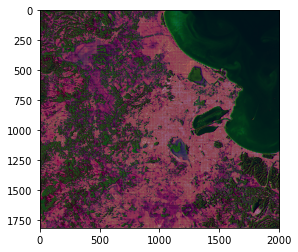

In [36]:
fig.clear()
ax.clear()

landwater = np.where((landcover2D == 7) | (landcover2D == 5) | (landcover2D == 11) | (landcover2D == 1),1,0)

fig2,ax2 = pyplot.subplots()
ax2.imshow(image)
ax2.pcolormesh(landwater, cmap='PiYG', vmin=0, vmax=1,alpha=0.006)

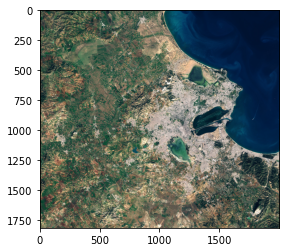

In [37]:
fig.clear()
ax.clear()

del landcover2D
gc.collect()

landImage = image.convert("RGBA")
pyplot.imshow(landImage)

In [38]:
data2 = landImage.getdata()

landwater1D = np.reshape(landwater,(3634000,1))

landData = []
for i, item in enumerate(data2):
    if landwater1D[i] == 1:
        landData.append((item[0], item[1], item[2], 0))
    else:
        landData.append(item)

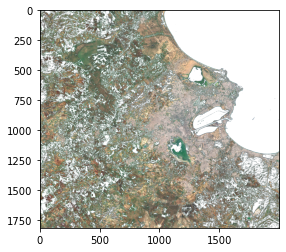

In [39]:
landImage.putdata(landData)

pyplot.imshow(landImage)

landImage.save("./TunisLand.png", "PNG")

In [40]:
del data2, landData
gc.collect()

waterImage = image.convert("RGBA")
data3 = waterImage.getdata()
waterData = []
for i, item in enumerate(data3):
    if landwater1D[i] == 0:
        waterData.append((item[0], item[1], item[2], 0))
    else:
        waterData.append(item)

5

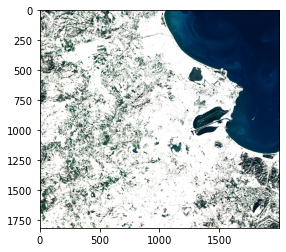

In [41]:
waterImage.putdata(waterData)

pyplot.imshow(waterImage)

waterImage.save("./TunisWater.png", "PNG")

del waterImage, data3, waterData, landwater1D
gc.collect()